# Exercice 4 : Nouveaux clients

## A- Améliorer la présentation de la table
et
## B- Comparer la distribution des clients par niveau avec la distribution du chiffre d'affaire en utilisant une table

In [1]:
import pandas as pd
import numpy as np

In [2]:
ClientsDistr = {'# clients':[77,19,338,425,24], '% clients':[8.72,2.15,38.28,48.13,2.72], 
                'CA M€': [4.68,3.93,5.98,2.81,0.37], 'CA %':[26.34,22.12,33.65,15.81,2.08]}
df = pd.DataFrame(ClientsDistr, columns=['# clients','% clients','CA M€','CA %'])
df.set_index([['A','A+','B','C','D']],inplace=True)
df




,# clients,% clients,CA M€,CA %
A,77,8.72,4.68,26.34
A+,19,2.15,3.93,22.12
B,338,38.28,5.98,33.65
C,425,48.13,2.81,15.81
D,24,2.72,0.37,2.08


In [3]:
dfPresent = df.loc[['A+','A','B','C','D']]
dfPresent = dfPresent.transpose()
dfPresent = dfPresent.loc[['# clients','CA M€','% clients','CA %']]
dfPresent

,A+,A,B,C,D
# clients,19.00,77.00,338.00,425.00,24.00
CA M€,3.93,4.68,5.98,2.81,0.37
% clients,2.15,8.72,38.28,48.13,2.72
CA %,22.12,26.34,33.65,15.81,2.08


## C- Comparer la distribution des clients par niveau avec la distribution du chiffre d'affaire en utilisant ce que vous voulez (graphe, courbes, ...)

In [4]:
import matplotlib.pyplot as plt
ClientsDistr = {'% clients':[8.72,2.15,38.28,48.13,2.72], 'CA %':[26.34,22.12,33.65,15.81,2.08]}
df = pd.DataFrame(ClientsDistr, columns=['% clients','CA %'])
df.set_index([['A','A+','B','C','D']],inplace=True)

df = df.loc[['A+','A','B','C','D']]




category_names = ['A+','A','B','C','D']
results = {
    '% clients': [2.15,8.72,38.28,48.13,2.72],
    'CA %': [22.12,26.34,33.65,15.81,2.08]
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('magma')(#('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c))+"%", ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')

    return fig, ax


survey(results, category_names)

plt.savefig('Distribution des clients.jpg', dpi=300)

plt.show()

<Figure size 920x500 with 1 Axes>

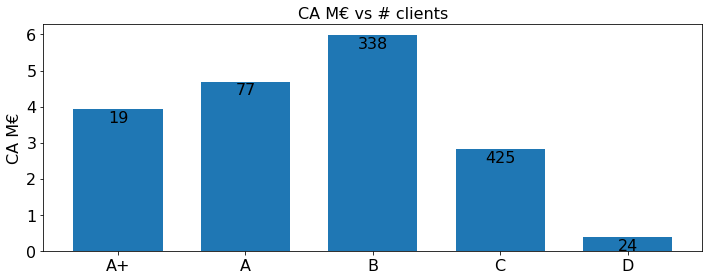

In [36]:
labels = ['A+','A','B','C','D']
vals = dfPresent.loc['CA M€']
vals2 = dfPresent.loc['# clients']

x = np.arange(len(labels))  # the label locations
width = 0.7  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 4))

rects1 = ax.bar(x, vals, width)#, label='Men')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CA M€', fontsize=16)
ax.set_title('CA M€ vs # clients', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
#ax.legend()

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
    
def autolabel(rects,nums):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height-0.35, '{:d}'.format(int(nums[i])),
                    horizontalalignment='center',fontsize=16)
    

autolabel(rects1,vals2)

fig.tight_layout()

plt.savefig('CA Meur vs num clients.jpg', dpi=300)

plt.show()